Max Degree: 78
Min Degree: 2
Average Degree: 3.98
Standard Deviation of Degree: 4.71


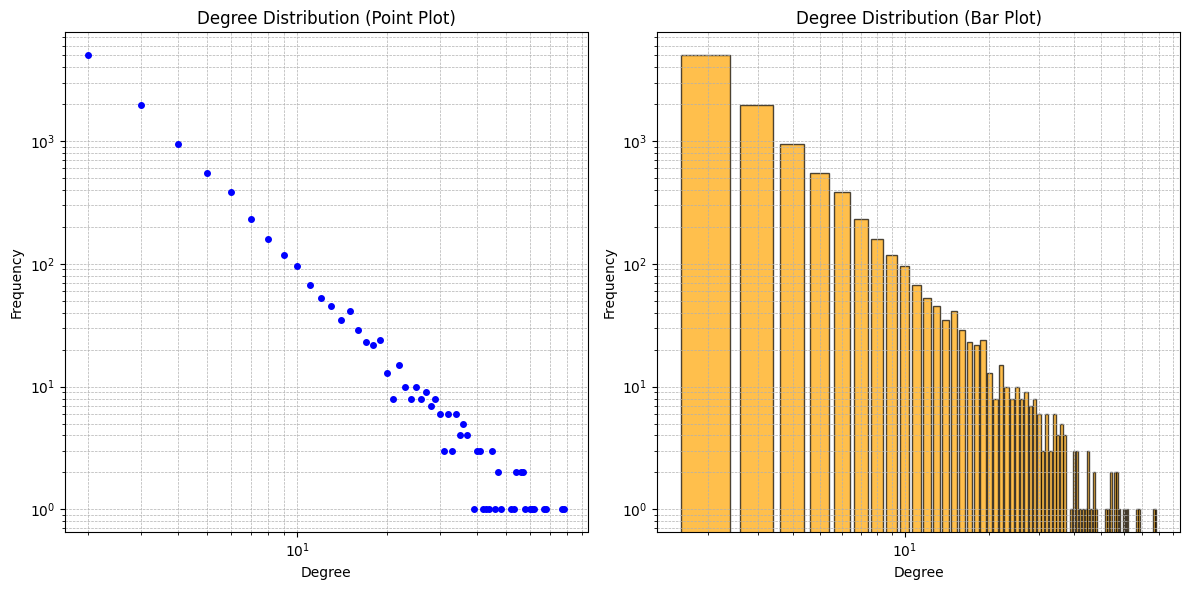

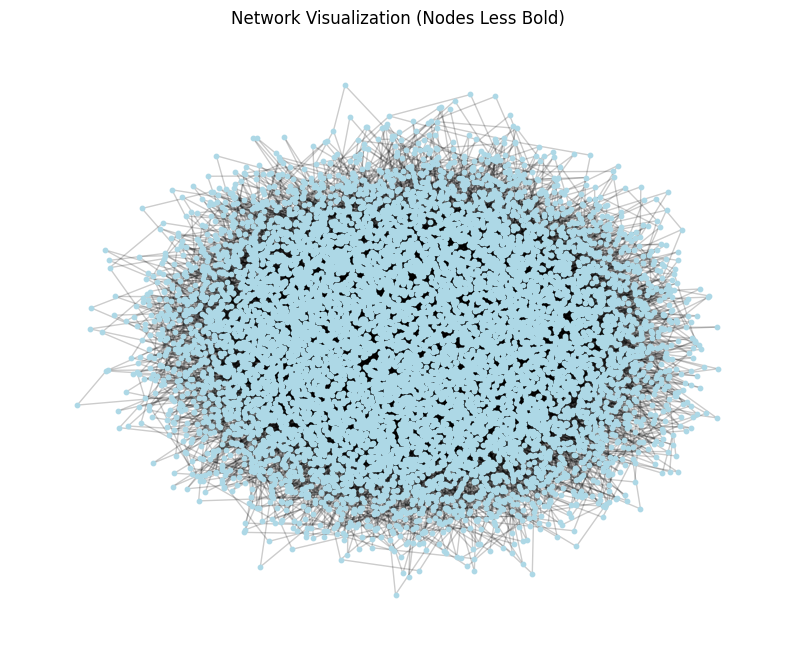

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize the network with 100 nodes
initial_nodes = 100
total_nodes = 10000
m = 2  # Number of edges to attach from a new node to existing nodes

# Create an empty graph
G = nx.Graph()

# Add initial 100 nodes with each node connected to exactly one other node
for i in range(initial_nodes):
    G.add_edge(i, (i + 1) % initial_nodes)

# Step 2: Grow the network using the BA algorithm
for new_node in range(initial_nodes, total_nodes):
    # Get the degrees of existing nodes
    degrees = [G.degree(node) for node in G.nodes()]
    
    # Normalize the degrees to get probabilities
    total_degree = sum(degrees)
    probabilities = [deg / total_degree for deg in degrees]
    
    # Select 'm' nodes to connect to based on preferential attachment
    targets = np.random.choice(list(G.nodes()), size=m, replace=False, p=probabilities)
    
    # Add edges from the new node to the selected targets
    for target in targets:
        G.add_edge(new_node, target)

# Step 3: Calculate degree statistics
degrees = [G.degree(node) for node in G.nodes()]
max_degree = max(degrees)
min_degree = min(degrees)
avg_degree = sum(degrees) / len(degrees)
std_dev_degree = np.std(degrees)

# Print degree statistics
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Standard Deviation of Degree: {std_dev_degree:.2f}")

# Step 4: Plot the degree distribution as a point plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First subplot for point plot
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

degree_values = list(degree_counts.keys())
degree_frequencies = list(degree_counts.values())

plt.plot(degree_values, degree_frequencies, 'o', markersize=4, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Point Plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Step 5: Plot the degree distribution as a bar plot
plt.subplot(1, 2, 2)  # Second subplot for bar plot
plt.bar(degree_values, degree_frequencies, color='orange', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Bar Plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Step 6: Network Visualization with Less Bold Nodes
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')  # Reduced node size
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Network Visualization (Nodes Less Bold)")
plt.axis('off')
plt.show()

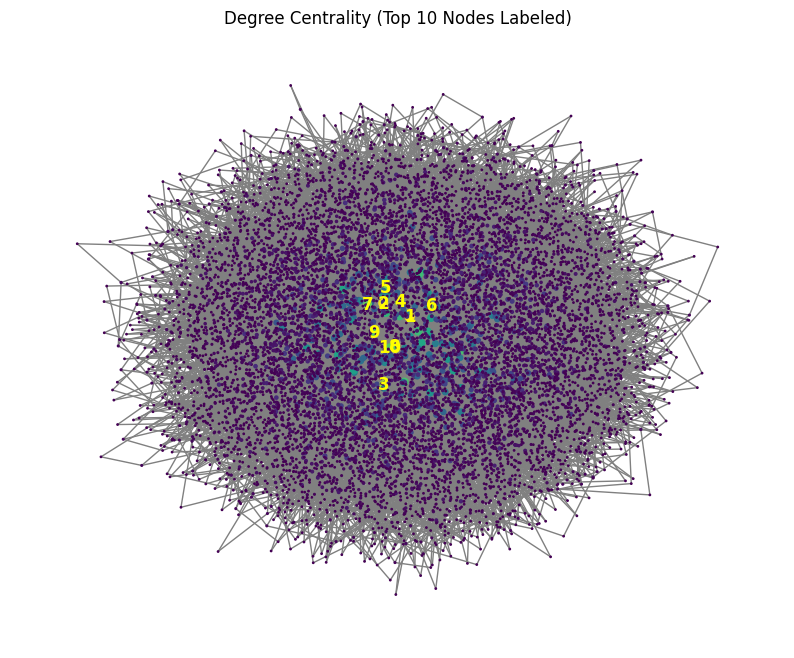


                                     Degree Centrality Analysis                                     
+--------+--------+----------+--------------+                 +----------------+--------------+
|   Rank |   Node |   Degree |   Centrality |                 | Degree Range   |   Node Count |
+========+========+==========+==============+                 +================+==============+
|      1 |     19 |       78 |       0.0078 |                 | 1-7            |         9121 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      2 |     35 |       77 |       0.0077 |                 | 8-14           |          574 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      3 |     51 |       68 |       0.0068 |                 | 15-21          |          160 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      4 |     89 |       67 |    

In [3]:
import networkx as nx
import numpy as np
from tabulate import tabulate

# Compute degree centrality and degree
degree_centrality = nx.degree_centrality(G)
degrees = dict(G.degree())  # Get node degrees

# Get the top 10 nodes by degree centrality
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Degree, Centrality)
table_data_top10 = [(i, node, degrees[node], round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Degree", "Centrality"]

# Define degree bins
bin_size = 7
max_degree = max(degrees.values()) if degrees else 1
bins = list(range(1, max_degree + bin_size, bin_size))

# Count nodes in each bin
degree_counts, _ = np.histogram(list(degrees.values()), bins=bins)

# Prepare bin data
table_data_bins = [(f"{bins[i]}-{bins[i+1]-1}", degree_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Degree Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * degree_centrality[node] for node in G]  # Scale node size
node_colors = list(degree_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Degree Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Degree Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

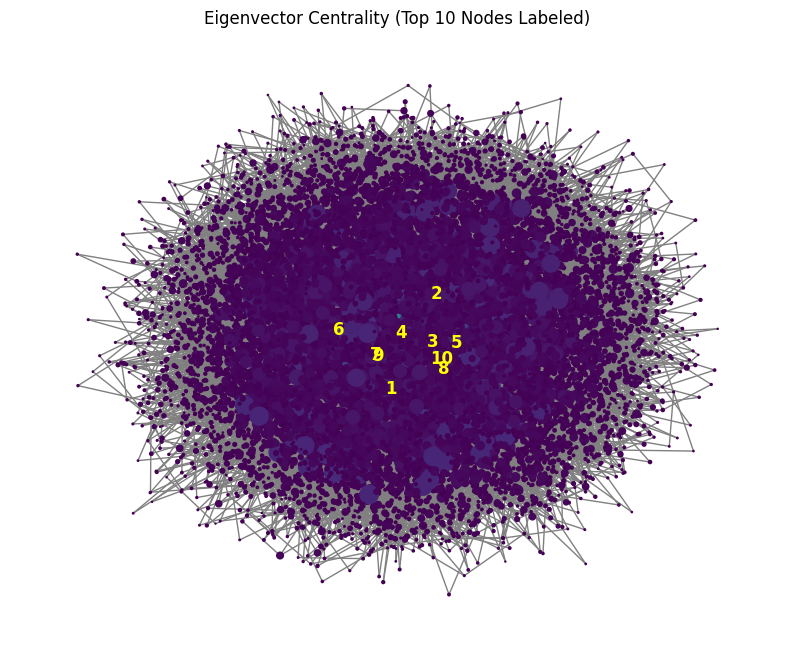


                                  Eigenvector Centrality Analysis                                   
+--------+--------+--------------+                            +--------------------+--------------+
|   Rank |   Node |   Centrality |                            | Centrality Range   |   Node Count |
+========+========+==============+                            +====================+==============+
|      1 |     35 |       0.324  |                            | 0.0-0.01           |         8929 |
+--------+--------+--------------+                            +--------------------+--------------+
|      2 |     19 |       0.2859 |                            | 0.01-0.02          |          720 |
+--------+--------+--------------+                            +--------------------+--------------+
|      3 |     89 |       0.175  |                            | 0.02-0.03          |          134 |
+--------+--------+--------------+                            +--------------------+--------------

In [8]:
import networkx as nx
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Get the top 10 nodes by eigenvector centrality
top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Centrality)
table_data_top10 = [(i, node, round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Centrality"]

# Define custom centrality bins
# Group [0.06, 0.3] into a single bin, and other ranges are handled separately
bins = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.4]  # Custom bin edges
bin_labels = ["0.0-0.01", "0.01-0.02", "0.02-0.03", "0.03-0.04", "0.04-0.05", "0.05-0.1", "0.1-0.4"]

# Count nodes in each bin
centrality_values = list(eigenvector_centrality.values())
centrality_counts, _ = np.histogram(centrality_values, bins=bins)

# Prepare bin data
table_data_bins = [(bin_labels[i], centrality_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Centrality Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * eigenvector_centrality[node] for node in G]  # Scale node size
node_colors = list(eigenvector_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Eigenvector Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Eigenvector Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

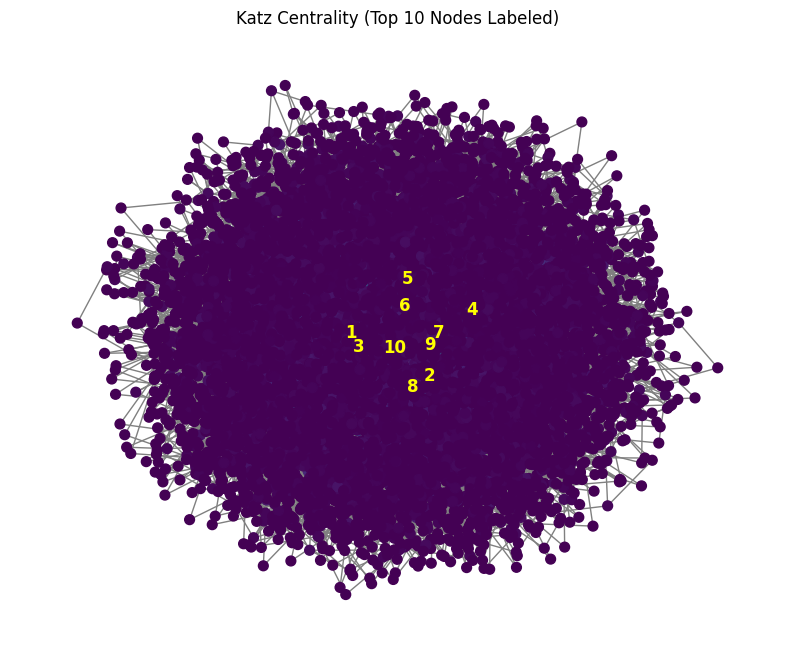


                                      Katz Centrality Analysis                                      
+--------+--------+--------------+                            +--------------------+--------------+
|   Rank |   Node |   Centrality |                            | Centrality Range   |   Node Count |
+========+========+==============+                            +====================+==============+
|      1 |     19 |       0.0137 |                            | 0.000-0.010        |         7689 |
+--------+--------+--------------+                            +--------------------+--------------+
|      2 |     35 |       0.0137 |                            | 0.010-0.020        |         2311 |
+--------+--------+--------------+                            +--------------------+--------------+
|      3 |     51 |       0.0133 |                            
+--------+--------+--------------+                            
|      4 |     89 |       0.0132 |                            
+--------

In [9]:
# Compute Katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-6, nstart={n: 1 for n in G.nodes()})

# Get the top 10 nodes by Katz centrality
top_10_nodes = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Centrality)
table_data_top10 = [(i, node, round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Centrality"]

# Define centrality bins
bin_size = 0.01
max_centrality = max(katz_centrality.values()) if katz_centrality else 1
bins = np.arange(0, max_centrality + bin_size, bin_size)

# Count nodes in each bin
centrality_counts, _ = np.histogram(list(katz_centrality.values()), bins=bins)

# Prepare bin data
table_data_bins = [(f"{bins[i]:.3f}-{bins[i+1]:.3f}", centrality_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Centrality Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * katz_centrality[node] for node in G]  # Scale node size
node_colors = list(katz_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Katz Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Katz Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

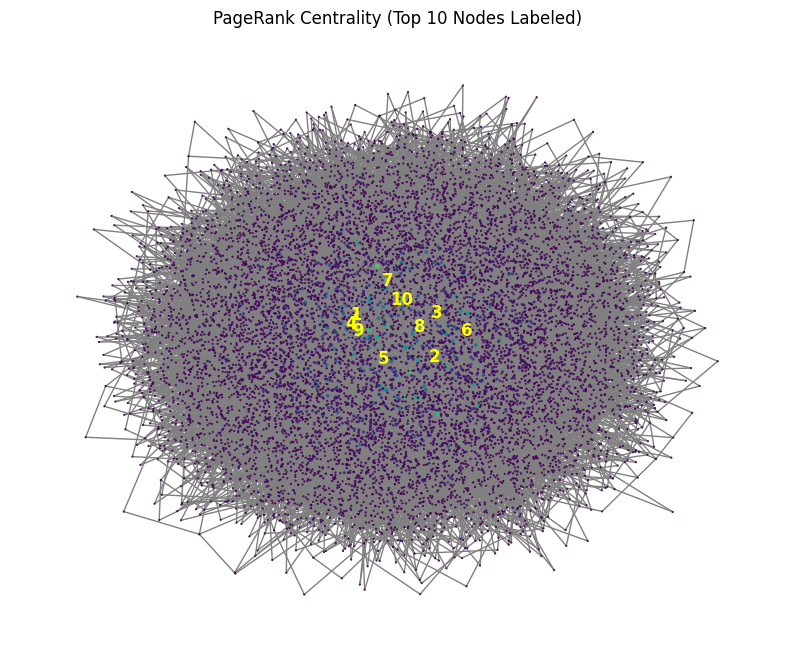


                                    PageRank Centrality Analysis                                    
+--------+--------+--------------+                            +--------------------+--------------+
|   Rank |   Node |   Centrality |                            | Centrality Range   |   Node Count |
+========+========+==============+                            +====================+==============+
|      1 |     19 |       0.0017 |                            | 0.0-0.0001         |         7229 |
+--------+--------+--------------+                            +--------------------+--------------+
|      2 |     35 |       0.0016 |                            | 0.0001-0.0003      |         2418 |
+--------+--------+--------------+                            +--------------------+--------------+
|      3 |     51 |       0.0014 |                            | 0.0003-0.0005      |          225 |
+--------+--------+--------------+                            +--------------------+--------------

In [13]:
import networkx as nx
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Compute PageRank centrality
pagerank_centrality = nx.pagerank(G)

# Get the top 10 nodes by PageRank centrality
top_10_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Centrality)
table_data_top10 = [(i, node, round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Centrality"]

# Define custom centrality bins
# Group [0.06, 0.3] into a single bin, and other ranges are handled separately
bins = [0.0, 0.0001, 0.0003, 0.0005, 0.0007, 0.001]  # Custom bin edges
bin_labels = ["0.0-0.0001", "0.0001-0.0003", "0.0003-0.0005", "0.0005-0.0007", "0.0007-0.001"]

# Count nodes in each bin
centrality_values = list(pagerank_centrality.values())
centrality_counts, _ = np.histogram(centrality_values, bins=bins)

# Prepare bin data
table_data_bins = [(bin_labels[i], centrality_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Centrality Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * pagerank_centrality[node] for node in G]  # Scale node size
node_colors = list(pagerank_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("PageRank Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "PageRank Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

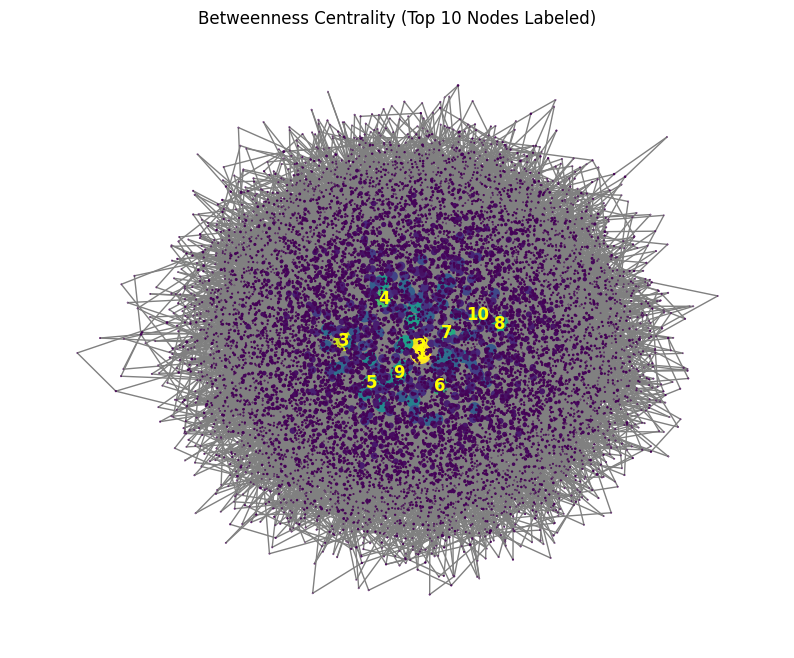


                                  Betweenness Centrality Analysis                                   
+--------+--------+--------------+                            +--------------------+--------------+
|   Rank |   Node |   Centrality |                            | Centrality Range   |   Node Count |
+========+========+==============+                            +====================+==============+
|      1 |     35 |       0.0404 |                            | 0.000-0.010        |         9941 |
+--------+--------+--------------+                            +--------------------+--------------+
|      2 |     19 |       0.0391 |                            | 0.010-0.020        |           44 |
+--------+--------+--------------+                            +--------------------+--------------+
|      3 |     51 |       0.0371 |                            | 0.020-0.030        |           12 |
+--------+--------+--------------+                            +--------------------+--------------

In [11]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get the top 10 nodes by betweenness centrality
top_10_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Centrality)
table_data_top10 = [(i, node, round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Centrality"]

# Define centrality bins
bin_size = 0.01
max_centrality = max(betweenness_centrality.values()) if betweenness_centrality else 1
bins = np.arange(0, max_centrality + bin_size, bin_size)

# Count nodes in each bin
centrality_counts, _ = np.histogram(list(betweenness_centrality.values()), bins=bins)

# Prepare bin data
table_data_bins = [(f"{bins[i]:.3f}-{bins[i+1]:.3f}", centrality_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Centrality Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * betweenness_centrality[node] for node in G]  # Scale node size
node_colors = list(betweenness_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Betweenness Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Betweenness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

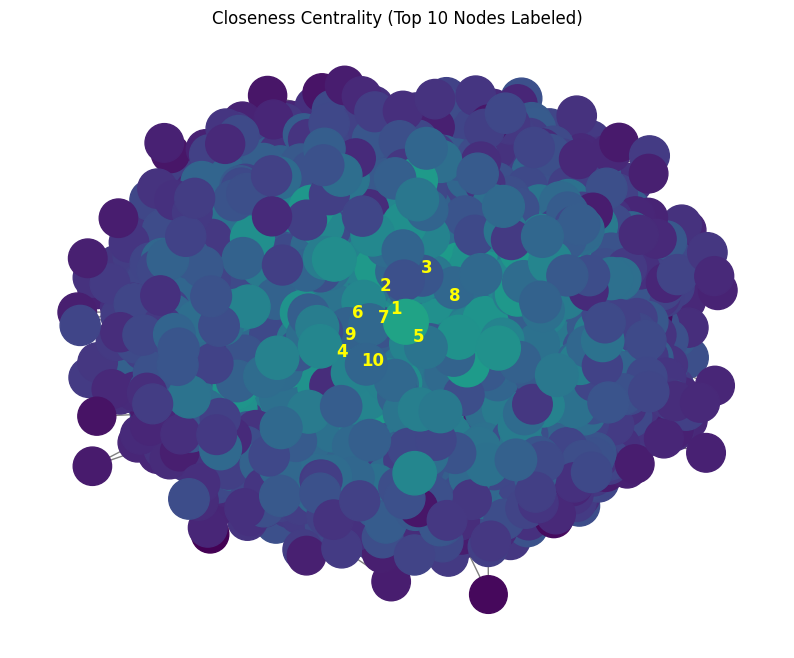


                                   Closeness Centrality Analysis                                    
+--------+--------+--------------+                            +--------------------+--------------+
|   Rank |   Node |   Centrality |                            | Centrality Range   |   Node Count |
+========+========+==============+                            +====================+==============+
|      1 |     35 |       0.2534 |                            | 0.14-0.16          |          245 |
+--------+--------+--------------+                            +--------------------+--------------+
|      2 |     51 |       0.2521 |                            | 0.16-0.18          |         3779 |
+--------+--------+--------------+                            +--------------------+--------------+
|      3 |     19 |       0.252  |                            | 0.18-0.2           |         4680 |
+--------+--------+--------------+                            +--------------------+--------------

In [15]:
import networkx as nx
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the top 10 nodes by closeness centrality
top_10_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Centrality)
table_data_top10 = [(i, node, round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Centrality"]

# Define custom centrality bins
bins = [0.14, 0.16, 0.18, 0.2, 0.24, 0.26]  # Custom bin edges
bin_labels = ["0.14-0.16", "0.16-0.18", "0.18-0.2", "0.2-0.24", "0.24-0.26"]  # Human-readable bin labels

# Count nodes in each bin
centrality_values = list(closeness_centrality.values())
centrality_counts, _ = np.histogram(centrality_values, bins=bins)

# Prepare bin data
table_data_bins = [(bin_labels[i], centrality_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Centrality Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * closeness_centrality[node] for node in G]  # Scale node size
node_colors = list(closeness_centrality.values())  # Node colors based on centrality

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Closeness Centrality (Top 10 Nodes Labeled)")
plt.show()

# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Closeness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)

Total number of activated nodes: 189
Number of steps to reach maximum activation: 8
Step-by-step activation counts: [69, 49, 30, 16, 7, 5, 3, 0]


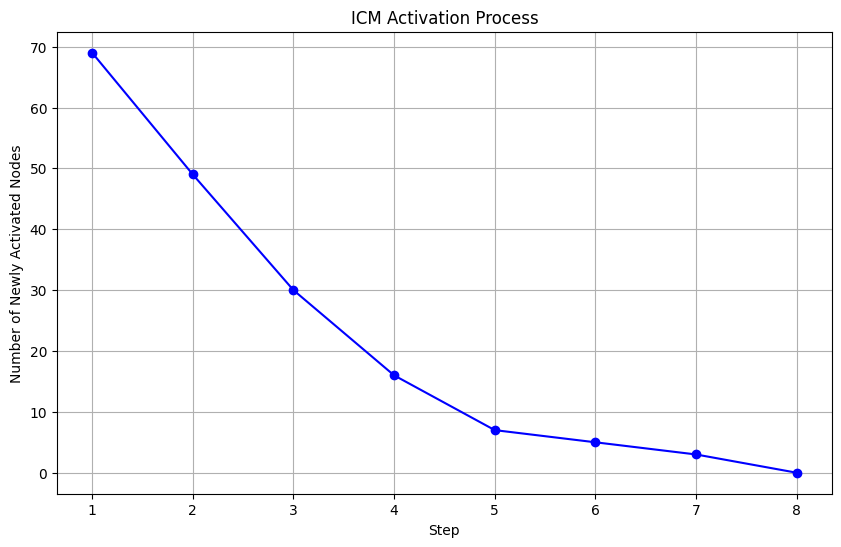

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Apply ICM to the network
# Define the seed nodes (e.g., top 10 nodes by degree centrality)
degree_centrality = nx.degree_centrality(G)
top_seeds = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
seeds = [node for node, _ in top_seeds]

# Run the ICM with a fixed activation probability (e.g., 0.1)
activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=0.1)

# Step 3: Print results
print(f"Total number of activated nodes: {len(activated_nodes)}")
print(f"Number of steps to reach maximum activation: {steps}")
print(f"Step-by-step activation counts: {step_counts}")

# Step 4: Visualize the activation process
plt.figure(figsize=(10, 6))
plt.plot(range(1, steps + 1), step_counts, marker='o', color='blue')
plt.title("ICM Activation Process")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()

Trial 1:
  Seed nodes: [988, 7542, 992, 4074, 340, 5724, 3715, 2315, 8439, 282]
  Total number of activated nodes: 91
  Number of steps to reach maximum activation: 13
Trial 2:
  Seed nodes: [7479, 4556, 6800, 6371, 361, 3823, 8681, 2040, 9093, 3471]
  Total number of activated nodes: 15
  Number of steps to reach maximum activation: 2
Trial 3:
  Seed nodes: [4392, 879, 2327, 6850, 3765, 9186, 992, 2043, 7257, 5664]
  Total number of activated nodes: 17
  Number of steps to reach maximum activation: 3
Trial 4:
  Seed nodes: [434, 5432, 9555, 4857, 2743, 9162, 896, 352, 2562, 4892]
  Total number of activated nodes: 21
  Number of steps to reach maximum activation: 3
Trial 5:
  Seed nodes: [5363, 2663, 6680, 4332, 5788, 7546, 4656, 4208, 5406, 3158]
  Total number of activated nodes: 15
  Number of steps to reach maximum activation: 4

Summary of Results:
Average number of steps to reach maximum activation: 5.00
Average number of activated nodes: 31.80


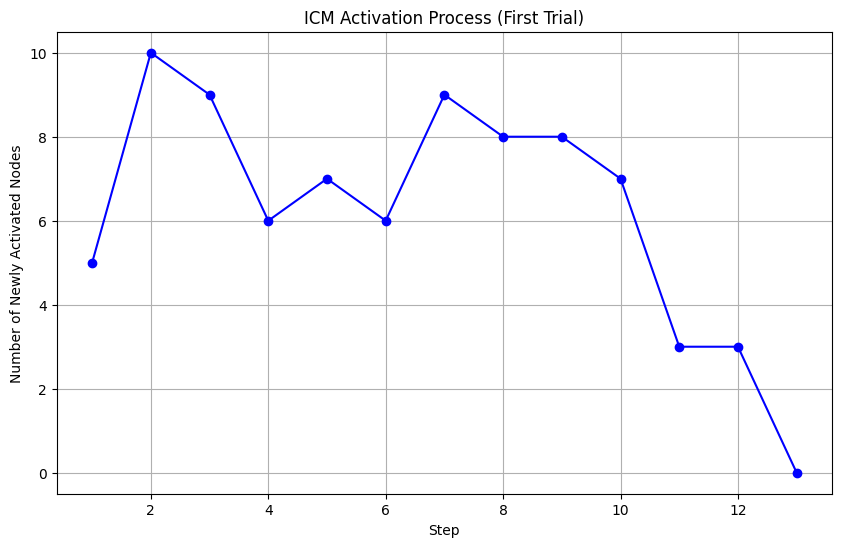

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Run ICM multiple times with different seed nodes
num_trials = 5  # Number of trials
activation_prob = 0.1  # Activation probability
steps_list = []  # To store the number of steps for each trial
activated_nodes_list = []  # To store the total number of activated nodes for each trial
all_step_counts = []  # To store step counts for each trial

for trial in range(num_trials):
    # Randomly select seed nodes for each trial
    seeds = random.sample(list(G.nodes()), 10)  # Select 10 random nodes as seeds
    
    # Run the ICM simulation
    activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=activation_prob)
    
    # Record results
    steps_list.append(steps)
    activated_nodes_list.append(len(activated_nodes))
    all_step_counts.append(step_counts)  # Save step counts for visualization
    
    # Print results for the current trial
    print(f"Trial {trial + 1}:")
    print(f"  Seed nodes: {seeds}")
    print(f"  Total number of activated nodes: {len(activated_nodes)}")
    print(f"  Number of steps to reach maximum activation: {steps}")

# Step 3: Calculate and print the average results
average_steps = sum(steps_list) / num_trials
average_activated_nodes = sum(activated_nodes_list) / num_trials

print("\nSummary of Results:")
print(f"Average number of steps to reach maximum activation: {average_steps:.2f}")
print(f"Average number of activated nodes: {average_activated_nodes:.2f}")

# Step 4: Visualize the activation process for the first trial
plt.figure(figsize=(10, 6))
first_trial_step_counts = all_step_counts[0]  # Step counts for the first trial
plt.plot(range(1, len(first_trial_step_counts) + 1), first_trial_step_counts, marker='o', color='blue')
plt.title("ICM Activation Process (First Trial)")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()